<a href="https://colab.research.google.com/github/tariqzahratahdi/DataScience/blob/main/course_seaborn_statistical_estimation_and_error_bars_fr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation statistique et barres d'erreur

L'estimation statistique consiste à réduire plusieurs points de données à une statistique récapitulative, telle que la moyenne ou la médiane.

Lors de l'affichage d'une statistique récapitulative, il est généralement judicieux d'ajouter des barres d'erreur, qui fournissent un repère visuel sur la qualité de la représentation des points de données sous-jacents.

Dans Seaborn, il existe deux approches pour construire chaque type de barre d'erreur.

L'une est paramétrique, utilisant une formule qui repose sur des hypothèses concernant la forme de la distribution.

L'autre est non paramétrique, utilisant uniquement les données que vous fournissez.

course-seaborn-statistical-estimation-and-error-bars-00.svg

Écart type (standard deviation)
<br><br>
$\sigma = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n}}$
<br><br>
Erreur standard (standard error)
<br><br>
$SE = \frac{\sigma}{\sqrt{n}}$
<br><br>
où
* $x$ est un point de données dans le dataset,
* $\bar{x}$ est la moyenne du dataset,
* $n$ est le nombre de points de données dans le dataset.

Le paramètre de taille est défini différemment selon que l'approche est paramétrique ou non.

Pour les barres d'erreur paramétriques, il s'agit d'un facteur scalaire multiplié par la statistique définissant l'erreur (erreur type ou écart type).

Pour les barres d'erreur non paramétriques, il s'agit d'une largeur en percentile.

Pour comparer les différentes paramétrisations, nous utiliserons la fonction d'aide suivante:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

# Mesures de la dispersion des données

## Barres d'erreur d'écart type

Par défaut, `errorbar="sd"` trace des barres d'erreur à +/- 1 écart type autour de l'estimation, mais la plage peut être augmentée en définissant un paramètre de taille d'échelle.

Notez que, en supposant des données distribuées normalement, environ 68 % des données se situeront dans un écart type, environ 95 % dans deux et environ 99,7 % dans trois.

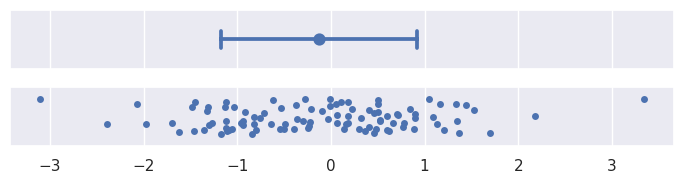

In [ ]:
plot_errorbars("sd")

## Barres d'erreur d'intervalle de percentile

Les intervalles de percentile représentent également la plage dans laquelle se situe une partie des données, mais ils le font en calculant ces percentiles directement à partir de votre échantillon.

Par défaut, `errorbar="pi"` affiche un intervalle de 95 %, allant du 2,5e au 97,5e percentile.

Vous pouvez choisir une plage différente en passant un paramètre de taille, par exemple pour afficher l'écart interquartile.

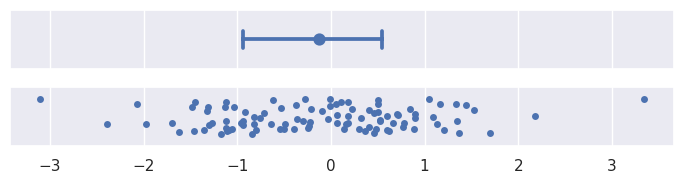

In [ ]:
plot_errorbars(("pi", 50))

# Mesures de l'incertitude de l'estimation

Si vos données proviennent d'un échantillon aléatoire d'une population plus large, la moyenne (ou toute autre estimation) sera une mesure imparfaite de la moyenne réelle de la population.

Les barres d'erreur qui indiquent l'incertitude de l'estimation tentent de représenter la plage de valeurs probables pour le paramètre réel.

## Barres d'erreur standard

L'erreur standard est liée à l'écart type: il s'agit simplement de l'écart type divisé par la racine carrée de la taille de l'échantillon.

Par défaut, avec `errorbar="se"`, un intervalle d'erreur standard de +/-1 est tracé à partir de la moyenne.

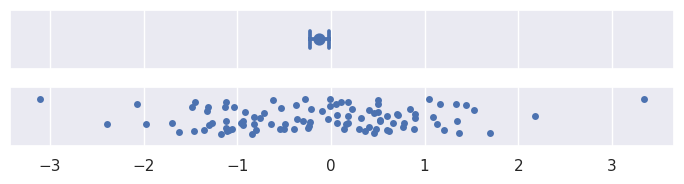

In [ ]:
plot_errorbars("se")

## Barres d'erreur de l'intervalle de confiance

L'approche non paramétrique de représentation de l'incertitude utilise le bootstrap: une procédure dans laquelle l'ensemble de données est rééchantillonné aléatoirement avec remise à plusieurs reprises, et l'estimation est recalculée à partir de chaque rééchantillonnage.

Cette procédure crée une distribution statistique approximative de la distribution des valeurs que vous auriez pu obtenir pour votre estimation avec un échantillon différent.

L'intervalle de confiance est construit en prenant un intervalle de percentile de la distribution bootstrap.

Par défaut, `errorbar="ci"` trace un intervalle de confiance de 95%.

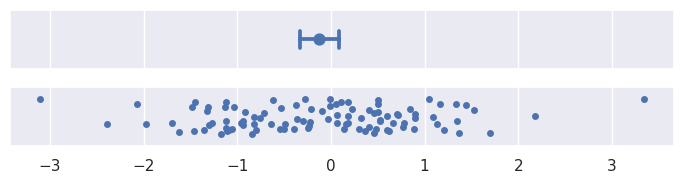

In [ ]:
plot_errorbars("ci")

# Barres d'erreur sur les ajustements de régression

Des barres d'erreur apparaissent également dans Seaborn lors de l'estimation des modèles de régression pour visualiser les relations.

Ici, les barres d'erreur sont représentées par une "bande" autour de la droite de régression.